In [1]:
from product import Option, Strategy
from euronext import Page
from graph import Graph
g=Graph(4800, 5400, 25)


In [2]:
p = Page()
p.fetch()
options = p.scrap_options()
call = p.call
put = p.put
for k, o in p.call.items():
    o.multiplier=10
for k, o in p.put.items():
    o.multiplier=10


In [ ]:
# test data when interet is fall
import numpy as np
sT = np.arange(4800,5400,25)
o = Option(strike=4900, achat=212.40, vente=219.40, multiplier=10)
c = Option(cat='Call', strike=4900, achat=212.40, vente=219.40, multiplier=10)
p = Option(cat='Put', strike=4900, achat=9.10, vente=11.60, multiplier=10)
print(str(o));print(str(c));print(str(p))

In [ ]:
s2 = Strategy('Strategy : call+2*put long').add(call[4900], 'long', 1).add(call[5300], 'short', 2)
g.profit(call[4950], 'long')
g.profit_strategy(s2)
g.compare(call[5000], 'long', s2, 'long')

In [ ]:
butterfly = (Strategy('Butterfly C5000-2*C5100+C5200')
             .add(call[5000], 'long', 1)
             .add(call[5150], 'short', 2)
             .add(call[5300], 'long', 1))
print('Cost : {}'.format(butterfly.cost()))
g.profit_strategy(butterfly)
g.compare(call[5100], 'long', butterfly, 'long')

In [ ]:
ratio_backspreads = (Strategy('Ratio Backspreads 1C5000+2C5200')
             .add(call[4900], 'long', 1)
             .add(call[5000], 'long', 2))
print('Ratio Backspreads Cost : {}'.format(ratio_backspreads.cost()))
print('Call 5000 Cost : {}'.format(call[5000].cost('long')))

g.profit_strategy(ratio_backspreads)
g.compare(ratio_backspreads, 'long', call[5000], 'long')

In [ ]:
straddle = (Strategy('Straddle C5100+P5100')
             .add(call[5100], 'long', 1)
             .add(put[5100], 'long', 1))
print('Straddle Cost : {}'.format(straddle.cost()))
g.profit_strategy(straddle)

In [ ]:
strat1 = (Strategy('Stratis 5100-..-5300 croissant')
             .add(put[5100], 'short', 3)
             .add(put[5200], 'short', 2)
             .add(put[5300], 'short', 1)
        )
strat2 = (Strategy('Stratis 5100-..-5300 decroissant')
             .add(put[5100], 'short', 1)
             .add(put[5200], 'short', 2)
             .add(put[5300], 'short', 3)
        )
print('{} Cost : {}'.format(strat1.label, strat1.cost()))
print('{} Cost : {}'.format(strat2.label, strat2.cost()))
g.profit_strategy(strat1)
g.profit_strategy(strat2)
g.compare(strat1, 'long', strat2, 'long')

In [ ]:
g.profit(call[5200], 'long')
print('cost: {}'.format(call[5200].cost('long')))
g.profit(call[5000], 'long')
print('cost: {}'.format(call[5000].cost('long')))


Ratio : 13.0/2.7 ~ 5
Ratio Spread 5200.0-5300.0 R:5 Cost : -5.0


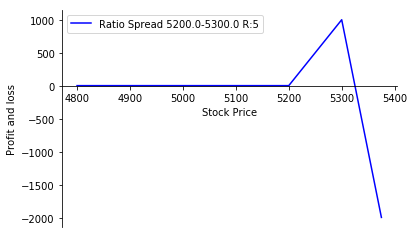

In [3]:
#ratio-spreads
from product import RatioSpread
rspread2 = RatioSpread(call[5200], call[5300])
print('{} Cost : {}'.format(rspread2.label, rspread2.cost()))
g.profit_strategy(rspread2)

Box Spread 5200.0-5000.0 Cost : 1911.0


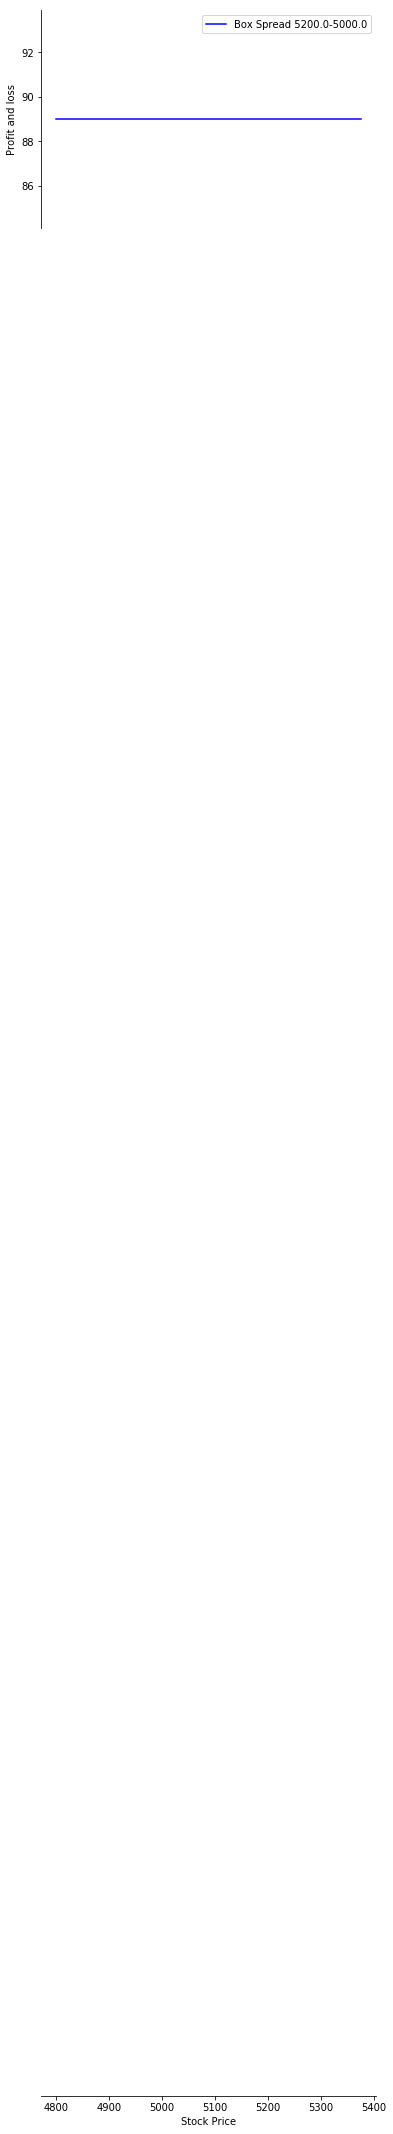

In [34]:
#????
#box-spreads pour John Hull
from math import ceil, floor
def BoxSpread(call_long, call_short, put_long, put_short):
    """A Box Spread is buy and sell put and call of different strike:
       - short a put at a strike
       - long a put at a strike inferior
       This a strategy of hedgin not speculatif
    """
    plong = call_long.achat
    pshort = call_short.vente
    plong = put_long.achat
    pshort = put_short.vente
    return (Strategy('Box Spread {}-{}'.format(put_long.strike, put_short.strike))
            .add(call_long, 'long', 1)
            .add(call_short, 'short', 1)
            .add(put_long, 'long', 1)
            .add(put_short, 'short', 1)
           )
bspread2 = BoxSpread(call[5000], call[5200], put[5200], put[5000])
print('{} Cost : {}'.format(bspread2.label, bspread2.cost()))
g.profit_strategy(bspread2)

Call Spread 4900.0-5000.0 Cost : 809.0


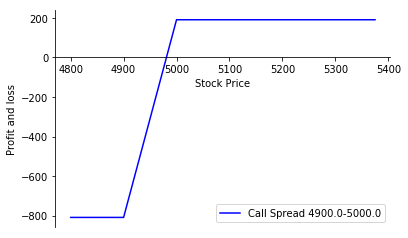

In [40]:
#call-spreads
#bull-spreads pour John Hull
from math import ceil, floor
def CallSpread(call_long, call_short):
    """A Call Spread is buy and sell call of different strike:
       - long a call at a strike
       - short a call at a strike superior
    """
    plong = call_long.achat
    pshort = call_short.vente
    return (Strategy('Call Spread {}-{}'.format(call_long.strike, call_short.strike))
            .add(call_long, 'long', 1)
            .add(call_short, 'short', 1)
           )
cspread2 = CallSpread(call[4900], call[5000])
print('{} Cost : {}'.format(cspread2.label, cspread2.cost()))
g.profit_strategy(cspread2)


Put Spread 5200.0-5000.0 Cost : 816.0


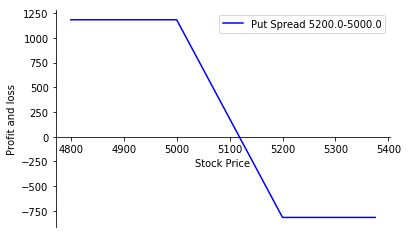

In [41]:
#put-spreads
#bear-spreads pour John Hull
from math import ceil, floor
def PutSpread(put_long, put_short):
    """A Put Spread is buy and sell put of different strike:
       - long a put at a strike
       - short a put at a strike inferior
    """
    plong = put_long.achat
    pshort = put_short.vente
    return (Strategy('Put Spread {}-{}'.format(put_long.strike, put_short.strike))
            .add(put_long, 'long', 1)
            .add(put_short, 'short', 1)
           )
pspread2 = PutSpread(put[5200], put[5000])
print('{} Cost : {}'.format(pspread2.label, pspread2.cost()))
g.profit_strategy(pspread2)


Iron Condor 5050.0/5000.0 - 5250.0/5300.0 Cost : -210.0


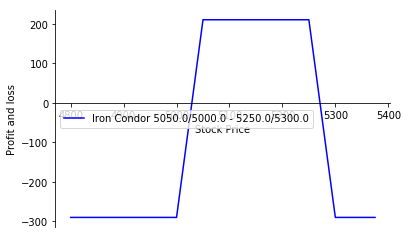

In [47]:
#Iron Condor
#??? pour John Hull
from math import ceil, floor
def IronCondor(put_k1, put_k2, call_k3, call_k4):
    """An Iron Condor is buy and sell put of different strike:
       - short put spread 90/80 permet d'encaisser 2.75
       - short call spread 110/120 permet d'encaisser 3.11
       That is equivalent to:
       - short a put at a strike (90)
       - long a put at a strike inferior (80)
       - short a call at a strike (110)
       - long a call at a strike superior (120)
       The spread strike must be the same
    """
    return (Strategy('Iron Condor {}/{} - {}/{}'.format(put_k1.strike, put_k2.strike, call_k3.strike, call_k4.strike))
            .add(put_k1, 'short', 1)
            .add(put_k2, 'long', 1)
            .add(call_k3, 'short', 1)
            .add(call_k4, 'long', 1)
           )
ironcondor = IronCondor(put[5050], put[5000], call[5250], call[5300])
print('{} Cost : {}'.format(ironcondor.label, ironcondor.cost()))
g.profit_strategy(ironcondor)
